<a href="https://colab.research.google.com/github/csipop/TAREAS_MASTER/blob/main/Trabajo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importamos las librerias y leemos el archivo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder

In [ ]:
df_bmw = pd.read_csv("/content/drive/MyDrive/Trabajos Master/Trabajo_1_Limpieza_de_datos/bmw_pricing_v3 (1).csv")

#Vista inicial de los datos

In [ ]:
df_bmw.head(10)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
7,BMW,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,2018-02-01
8,NaN,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
9,BMW,320,139541.0,135.0,NaN,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,2018-03-01


In [ ]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
df_bmw.columns

Index(['marca', 'modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina',
       'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio', 'fecha_venta'],
      dtype='object')

In [ ]:
df_bmw.describe().round(2)

,km,potencia,precio
count,4841.00,4842.00,4837.00
mean,140959.35,128.98,15831.92
std,60208.53,38.99,9222.63
min,-64.00,0.00,100.00
25%,102884.00,100.00,10800.00
50%,141080.00,120.00,14200.00
75%,175217.00,135.00,18600.00
max,1000376.00,423.00,178500.00


In [ ]:
df_bmw.shape

(4843, 18)

Vemos que en la columna km hay un valor negativo el cual es imposible para esta variable

In [ ]:
df_bmw.sort_values("km").head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,NaN,640 Gran Coupé,-64.0,230.0,NaN,diesel,black,sedan,True,True,False,NaN,False,False,True,True,75000.0,2018-04-01
2409,NaN,420 Gran Coupé,476.0,120.0,NaN,diesel,blue,hatchback,True,True,False,NaN,False,True,True,True,30300.0,2018-08-01
4372,NaN,X5,612.0,183.0,2016-10-01,diesel,black,suv,True,True,False,NaN,False,False,True,True,49100.0,2018-06-01
3935,BMW,X5,706.0,155.0,2017-07-01,diesel,black,suv,True,True,False,NaN,True,True,True,NaN,41600.0,2018-02-01
3687,NaN,116,2399.0,85.0,NaN,diesel,white,subcompact,False,False,False,NaN,False,False,True,False,17300.0,2018-03-01


Como solo es un valor decidimos eliminarlo, ya que ademas contiene valores nulos en otras variables.

In [ ]:
df_bmw = df_bmw.drop(2938)

In [ ]:
df_bmw.describe().round(2)

,km,potencia,precio
count,4840.00,4841.00,4836.00
mean,140988.48,128.96,15819.69
std,60180.61,38.97,9184.24
min,476.00,0.00,100.00
25%,102928.25,100.00,10800.00
50%,141084.50,120.00,14200.00
75%,175221.50,135.00,18600.00
max,1000376.00,423.00,178500.00


##Nulos

In [ ]:
df_bmw.isnull().sum()

,0
marca,969
modelo,3
km,2
potencia,1
fecha_registro,2422
tipo_gasolina,5
color,445
tipo_coche,1460
volante_regulable,4
aire_acondicionado,486


Vemos que tenemos varios valores nulos, más adelante vamos a decidir que hacer con ellos

##Duplicados

In [ ]:
df_bmw[df_bmw.duplicated]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [ ]:
df_bmw[df_bmw.duplicated].shape

(0, 18)

No tenemos valores duplicados

#Variables de Fecha

Hay dos variables de fecha las cuales su Dtype es un objeto " fecha_registro" y "fecha_venta" vamos a convertirlas en variables de typo datatime

In [ ]:
df_bmw1 = df_bmw.copy()

In [ ]:
for i in ["fecha_registro", "fecha_venta"]:
  df_bmw1[i] = pd.to_datetime(df_bmw1[i])

In [ ]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4842 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4839 non-null   object        
 2   km                           4840 non-null   float64       
 3   potencia                     4841 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4837 non-null   object        
 6   color                        4397 non-null   object        
 7   tipo_coche                   3382 non-null   object        
 8   volante_regulable            4838 non-null   object        
 9   aire_acondicionado           4356 non-null   object        
 10  camara_trasera               4840 non-null   object        
 11  asientos_traseros_plegables  1452 non-null   obj

#Variables objeto a booleano

Vemos que en nuestro df hay muchas variables que son boleanas pero tienen el tipo de objeto. Para solucionarlo vamos a convertir estas variables en booleanas

In [ ]:
for i in ["volante_regulable", "aire_acondicionado", "camara_trasera", "asientos_traseros_plegables", "elevalunas_electrico", "bluetooth", "alerta_lim_velocidad"]:
  df_bmw1[i] = df_bmw1[i].astype(bool)

In [ ]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4842 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4839 non-null   object        
 2   km                           4840 non-null   float64       
 3   potencia                     4841 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4837 non-null   object        
 6   color                        4397 non-null   object        
 7   tipo_coche                   3382 non-null   object        
 8   volante_regulable            4842 non-null   bool          
 9   aire_acondicionado           4842 non-null   bool          
 10  camara_trasera               4842 non-null   bool          
 11  asientos_traseros_plegables  4842 non-null   boo

#Análisis de las variables nulas

Como hemos visto tenemos muchas variables nulas, por lo que aquí las vamos a análizar y decidir que hacer en cada variable

In [ ]:
df_bmw1.isnull().sum()

,0
modelo,0
km,0
potencia,0
fecha_registro,0
tipo_gasolina,5
color,445
tipo_coche,1458
volante_regulable,0
aire_acondicionado,0
camara_trasera,0


##Variable marca

In [ ]:
df_bmw1[df_bmw1["marca"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,True,True,True,True,11300.0,2018-01-01
8,NaN,Z4,123886.0,125.0,NaT,petrol,black,convertible,True,False,False,False,False,True,True,False,6200.0,2018-03-01
11,NaN,325,228000.0,145.0,NaT,diesel,black,NaN,True,True,False,False,True,False,True,True,13300.0,2018-03-01
18,NaN,325,205474.0,145.0,2009-05-01,diesel,NaN,NaN,True,True,False,True,True,True,True,True,11000.0,2018-04-01
21,NaN,218,24868.0,100.0,NaT,petrol,grey,convertible,False,True,False,True,False,True,True,True,31000.0,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,NaN,220 Active Tourer,153358.0,140.0,2015-06-01,diesel,grey,van,False,True,False,True,False,False,True,True,11700.0,2018-02-01
4807,NaN,218 Active Tourer,197276.0,112.0,NaT,diesel,white,van,True,True,False,True,False,True,True,True,13100.0,2018-02-01
4825,NaN,225 Active Tourer,33300.0,170.0,NaT,petrol,NaN,van,True,True,False,True,False,False,False,True,19200.0,2018-05-01
4834,NaN,218 Gran Tourer,47782.0,110.0,NaT,diesel,blue,NaN,False,True,False,True,False,False,True,True,14900.0,2018-07-01


Sabemos que solo puede haber una marca ya que estamos analizando un df de bmw, por lo que como esta variable contiene nulos y no aportara nada a nuestro modelo de predicción decidimos eliminarla

In [ ]:
del(df_bmw1["marca"])

##Variable modelo

In [ ]:
df_bmw1[df_bmw1["modelo"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,NaT,diesel,black,NaN,False,True,False,True,False,True,True,True,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,True,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,NaT,diesel,white,NaN,False,False,False,True,False,False,False,False,800.0,2018-03-01


En este caso nos encontramos con 3 valores nulos, como no podemos determinar que modelo es y esta variable puede ser util para nuestro modelo decidimos eliminar los valores nulos

In [ ]:
df_bmw1.dropna(subset=["modelo"], inplace=True)

##Variable km

In [ ]:
df_bmw1[df_bmw1["km"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,520,NaN,135.0,2012-12-01,diesel,black,NaN,True,True,True,False,True,True,True,True,20300.0,2018-02-01
4811,X3,NaN,190.0,NaT,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01


Vemos que hay dos valores nulos, lo que podemos hacer para solucionarlo es sustituir estos dos valores por la media

In [ ]:
df_bmw1["km"].fillna(df_bmw1["km"].mean(),inplace=True)



##Variable potencia

In [ ]:
df_bmw1[df_bmw1["potencia"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,True,False,False,True,True,18700.0,2018-03-01


Vemos que solo hay una variable con nulos, decidimos sustituir el valor nulo por la media

In [ ]:
df_bmw1["potencia"].fillna(df_bmw1["potencia"].mean(),inplace=True)

In [ ]:
#Mirar los valores pequeños

##Variable fecha_registro

In [ ]:
df_bmw1[df_bmw1["fecha_registro"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,True,True,True,True,True,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
6,325,205219.0,145.0,NaT,diesel,grey,convertible,True,True,False,True,True,True,True,True,12400.0,2018-02-01
8,Z4,123886.0,125.0,NaT,petrol,black,convertible,True,False,False,False,False,True,True,False,6200.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4834,218 Gran Tourer,47782.0,110.0,NaT,diesel,blue,NaN,False,True,False,True,False,False,True,True,14900.0,2018-07-01
4835,218 Active Tourer,165707.0,110.0,NaT,diesel,black,van,False,True,False,True,False,True,True,True,13600.0,2018-07-01
4837,218 Gran Tourer,66770.0,110.0,NaT,diesel,blue,van,False,True,False,True,False,False,True,False,13400.0,2018-07-01
4838,218 Gran Tourer,39743.0,110.0,NaT,diesel,black,NaN,False,True,False,True,False,False,True,False,14600.0,2018-08-01


<Axes: >

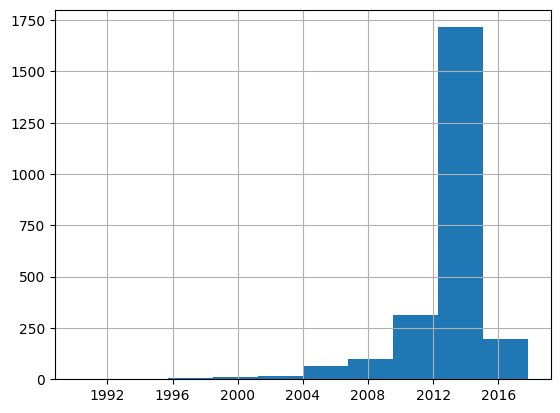

In [ ]:
df_bmw1["fecha_registro"].hist()

In [ ]:
df_bmw1["fecha_registro"].describe()

,fecha_registro
count,2419
mean,2012-12-06 03:42:38.247209728
min,1990-03-01 00:00:00
25%,2012-07-01 00:00:00
50%,2013-07-01 00:00:00
75%,2014-04-01 00:00:00
max,2017-11-01 00:00:00


En este caso observamos que hay muchos valores nulos (la mitad de nuestro dataset) como eliminar tantas variables no es buena idea y vemos que la mayoria de datos en las variables sin nulos se concentran en un espacio de tiempo pequeño, decidimos usar la media para sustituir los nulos de estas variables.

In [ ]:
df_bmw1["fecha_registro"].fillna(df_bmw1["fecha_registro"].mean(),inplace=True)

In [ ]:
df_bmw1["fecha_registro"].describe()

,fecha_registro
count,4839
mean,2012-12-06 03:42:38.247209472
min,1990-03-01 00:00:00
25%,2012-12-06 03:42:38.247209728
50%,2012-12-06 03:42:38.247209728
75%,2013-07-01 00:00:00
max,2017-11-01 00:00:00


Observamos que este cambio no ha alterado mucho nuestro dataset

In [ ]:
#Fecha registro paula

##Variable tipo_gasolina

In [ ]:
df_bmw1[df_bmw1["tipo_gasolina"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,2012-12-06 03:42:38.247209728,NaN,black,NaN,False,False,False,False,False,False,False,False,18400.0,2018-03-01
185,320,186697.0,135.0,2012-11-01 00:00:00.000000000,NaN,white,estate,False,False,False,True,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,2013-01-01 00:00:00.000000000,NaN,black,estate,True,True,False,True,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,2012-12-06 03:42:38.247209728,NaN,white,NaN,False,True,False,True,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,2014-11-01 00:00:00.000000000,NaN,white,estate,False,True,False,True,False,False,False,True,100.0,2018-03-01


En este caso vamos a sustituir los nulos por la moda

In [ ]:
df_bmw1["tipo_gasolina"].fillna(df_bmw1["tipo_gasolina"].mode()[0],inplace=True)

##Variable color

In [ ]:
df_bmw1[df_bmw1["color"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
14,120,174631.0,120.0,2009-01-01 00:00:00.000000000,diesel,NaN,convertible,True,True,False,False,False,False,True,False,10500.0,2018-04-01
18,325,205474.0,145.0,2009-05-01 00:00:00.000000000,diesel,NaN,NaN,True,True,False,True,True,True,True,True,11000.0,2018-04-01
25,318,196092.0,85.0,1995-10-01 00:00:00.000000000,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,318,187294.0,105.0,2012-12-06 03:42:38.247209728,petrol,NaN,convertible,True,False,False,False,False,True,True,True,2400.0,2018-06-01
47,420,20996.0,135.0,2014-05-01 00:00:00.000000000,petrol,NaN,coupe,True,False,False,True,True,False,True,False,21400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4757,X4,61989.0,140.0,2014-12-01 00:00:00.000000000,diesel,NaN,NaN,False,False,False,True,False,True,False,True,28600.0,2018-09-01
4777,X5,285669.0,173.0,2007-08-01 00:00:00.000000000,diesel,NaN,NaN,True,True,False,True,True,False,True,True,9300.0,2018-09-01
4805,218 Active Tourer,35382.0,110.0,2012-12-06 03:42:38.247209728,diesel,NaN,van,False,True,False,True,False,True,True,True,13100.0,2018-02-01
4818,X3,110039.0,130.0,2009-07-01 00:00:00.000000000,diesel,NaN,NaN,False,True,False,True,False,False,True,False,1300.0,2018-05-01


Sustituimos los nulos por la moda

In [ ]:
df_bmw1["color"].fillna(df_bmw1["color"].mode()[0],inplace=True)

##Variable tipo_coche

In [ ]:
df_bmw1[df_bmw1["tipo_coche"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,NaN,True,True,False,True,True,True,True,True,11300.0,2018-01-01
2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,NaN,False,False,False,True,True,False,True,False,10200.0,2018-02-01
4,425,97097.0,160.0,2012-12-06 03:42:38.247209728,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,335,152352.0,225.0,2011-05-01 00:00:00.000000000,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
11,325,228000.0,145.0,2012-12-06 03:42:38.247209728,diesel,black,NaN,True,True,False,False,True,False,True,True,13300.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,216 Gran Tourer,48012.0,85.0,2016-02-01 00:00:00.000000000,diesel,blue,NaN,True,True,False,False,False,True,True,True,15600.0,2018-06-01
4834,218 Gran Tourer,47782.0,110.0,2012-12-06 03:42:38.247209728,diesel,blue,NaN,False,True,False,True,False,False,True,True,14900.0,2018-07-01
4838,218 Gran Tourer,39743.0,110.0,2012-12-06 03:42:38.247209728,diesel,black,NaN,False,True,False,True,False,False,True,False,14600.0,2018-08-01
4839,218 Active Tourer,49832.0,100.0,2015-06-01 00:00:00.000000000,diesel,grey,NaN,False,True,False,True,False,False,True,True,17500.0,2018-08-01


<Axes: >

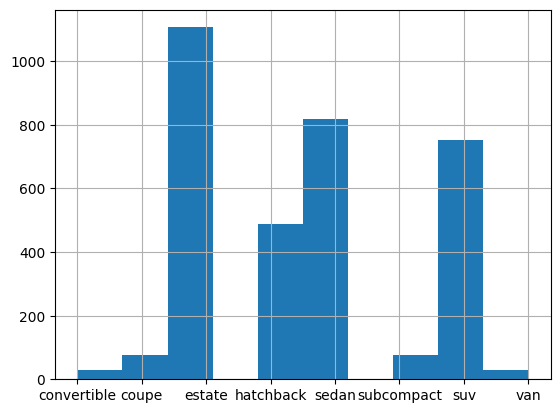

In [ ]:
df_bmw1["tipo_coche"].hist()

In [ ]:
df_bmw1["tipo_coche"].mode()

,tipo_coche
0,estate


En este caso vamos a eliminar la variable "tipo_coche" porque tiene muchos valores nulos y su distribución no es normal por lo que usar la moda u otros metodos solo alteriaria nuestra predicción y tampoco es una variable que nos aporte mucho.

In [ ]:
del(df_bmw1["tipo_coche"])

##Variable precio

In [ ]:
df_bmw1[df_bmw1["precio"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
117,420,174740.0,135.0,2013-11-01 00:00:00.000000000,diesel,NaN,coupe,True,True,True,False,True,True,True,True,NaN,2018-05-01
524,520,163803.0,135.0,2012-12-06 03:42:38.247209728,diesel,grey,estate,False,True,True,False,False,False,True,False,NaN,2018-02-01
539,316,34489.0,85.0,2012-12-06 03:42:38.247209728,diesel,black,estate,True,False,False,True,False,False,True,False,NaN,2018-02-01
549,318,157129.0,100.0,2012-12-06 03:42:38.247209728,diesel,blue,estate,True,True,True,False,True,False,True,True,NaN,2018-03-01
569,320,166866.0,120.0,2012-12-06 03:42:38.247209728,diesel,blue,NaN,True,True,False,True,True,True,True,True,NaN,2018-03-01
584,320,114771.0,135.0,2012-12-06 03:42:38.247209728,diesel,blue,NaN,False,True,False,True,False,False,True,False,NaN,2018-03-01


En este caso como el precio es nuestra variable target lo mejor es que eliminemos los nulos ya que son pocos valores y sustituirlos por la media podria afectar a nuestra predicción

In [ ]:
df_bmw1.dropna(subset=["precio"], inplace=True)

##Variable fecha_venta

In [ ]:
df_bmw1[df_bmw1["fecha_venta"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
594,525,269290.0,120.0,2012-12-06 03:42:38.247209728,diesel,silver,True,False,True,True,False,False,True,True,4200.0,NaT


Como solo es un valor el nulo lo vamos a eliminar

In [ ]:
df_bmw1.dropna(subset=["fecha_venta"], inplace=True)

In [ ]:
df_bmw1.isnull().sum()

,0
modelo,0
km,0
potencia,0
fecha_registro,0
tipo_gasolina,0
color,0
volante_regulable,0
aire_acondicionado,0
camara_trasera,0
asientos_traseros_plegables,0


#Analisis de las variables

In [ ]:
df_bmw2 = df_bmw1.copy()

In [ ]:
df_bmw2.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,True,True,False,True,True,True,True,True,11300.0,2018-01-01
1,M4,13929.0,317.0,2012-12-06 03:42:38.247209728,petrol,grey,True,True,False,True,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,False,False,False,True,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,2012-12-06 03:42:38.247209728,diesel,red,True,True,False,True,True,True,True,True,25100.0,2018-02-01
4,425,97097.0,160.0,2012-12-06 03:42:38.247209728,diesel,silver,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
target = ["precio"]

##Vamos a crear una función que identifique el tipo de cada variable del dataset de entrada.

In [ ]:
for i in df_bmw2:
  print(i, df_bmw2[i].dtype.kind)

modelo O
km f
potencia f
fecha_registro M
tipo_gasolina O
color O
volante_regulable b
aire_acondicionado b
camara_trasera b
asientos_traseros_plegables b
elevalunas_electrico b
bluetooth b
gps b
alerta_lim_velocidad b
precio f
fecha_venta M


In [ ]:
def obtener_lista_variables(dataset):

    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    lista_fechas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!=2 and (i not in target):
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="b") and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O") and i not in target:
              lista_categoricas.append(i)
        elif  (dataset[i].dtype.kind=="M") and i not in target:
              lista_fechas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas, lista_fechas

In [ ]:
lista_numericas, lista_boolean, lista_categoricas, lista_fechas = obtener_lista_variables(df_bmw2)

In [ ]:
lista_categoricas

['modelo', 'tipo_gasolina', 'color']

In [ ]:
lista_numericas

['km', 'potencia']

In [ ]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [ ]:
lista_fechas

['fecha_registro', 'fecha_venta']

##Análisis de las variables númericas

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]


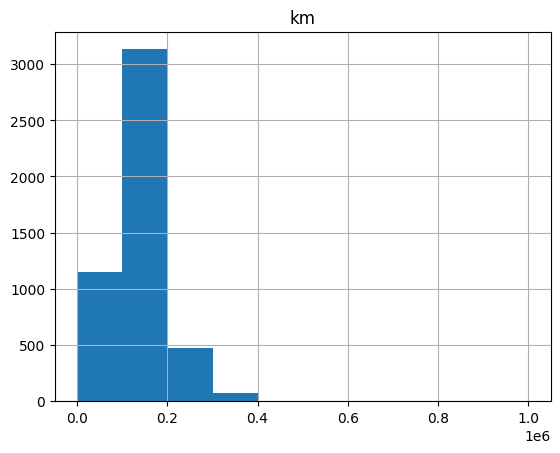

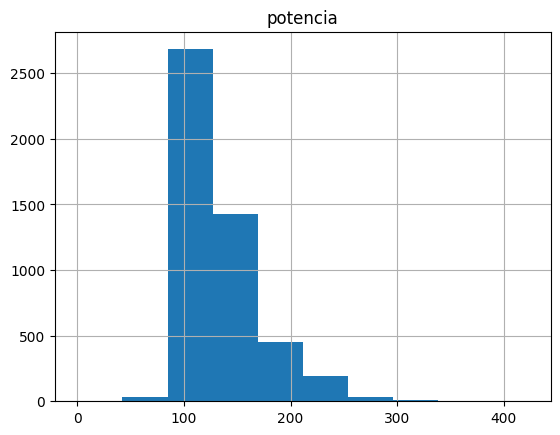

In [ ]:
for i in lista_numericas:
  print(df_bmw2.hist(i))

No vemos que hayan datos raros en las variables numericas. Observamos que en la variable de km la mayor parte de los datos se concentra entre 100.000 y 200.000 kilometros. Y que en la variable potencia la mayor parte de los datos se concentra alrededor de los 100 caballos de potencia.

##Análisis de las variables categoricas

In [ ]:
for i in lista_categoricas:
  print(df_bmw2.value_counts(i), '\n')

modelo
320                  750
520                  632
318                  567
X3                   438
116                  358
                    ... 
225                    1
220 Active Tourer      1
216                    1
214 Gran Tourer        1
i8                     1
Name: count, Length: 76, dtype: int64 

tipo_gasolina
diesel           4625
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64 

color
black     1940
grey      1069
blue       644
white      483
brown      302
silver     290
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64 



In [ ]:
df_bmw2.value_counts("modelo")

,count
modelo,
320,750
520,632
318,567
X3,438
116,358
...,...
225,1
220 Active Tourer,1
216,1


Mirando las variables categóricas, vemos que hay una columna (modelo) en las que algunos valores aparecen muy pocas veces. Vamos a eliminarlos.

In [ ]:
# La función hace lo siguiente:
#   - como parámetros de entrada tiene un dataset, el nombre de una columna y un valor umbral
#   - crea una lista vacía
#   - crea una tabla con los value counts de la columna del dataset que le pasamos como parámetro de entrada, a la que hace un reset index
#   - se recorre las filas del data set
#   - se pregunta si el nuevo dataset que tiene los conteos de los valores es menor al umbral
#   - en caso de que sea así se agrega en una lista

def obten_lista_eliminar(dataset, columna, umbral):

  lista_borrar = []
  tabla = dataset[columna].value_counts().reset_index()
  print(tabla)

  for i in range(0,len(tabla)):
    if (tabla.iloc[i]["count"]) < umbral:
      lista_borrar.append(tabla.iloc[i][columna])

  return lista_borrar

# Con esta función podemos eliminar aquellos valores que aparecen muy pocas veces (que serían outliers) de cada variable.

In [ ]:
lista_eliminar_modelos = obten_lista_eliminar(df_bmw2, "modelo", 10)

             modelo  count
0               320    750
1               520    632
2               318    567
3                X3    438
4               116    358
..              ...    ...
71             M135      1
72              225      1
73               i8      1
74              630      1
75  214 Gran Tourer      1

[76 rows x 2 columns]


In [ ]:
# Esta función tiene como parámetros de entrada un dataset, una columna y una lista.
# Elimina los valores de una columna del dataset que se encuentren en la lista.

def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)

In [ ]:
eliminar_lista_df(df_bmw2,"modelo",lista_eliminar_modelos)

In [ ]:
for i in lista_categoricas:
  print(df_bmw2.value_counts(i), '\n')

modelo
320                  750
520                  632
318                  567
X3                   438
116                  358
X1                   274
316                  234
X5                   231
525                  183
530                  157
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   46
X6                    44
420                   43
120                   36
420 Gran Coupé        33
330                   33
730                   33
520 Gran Turismo      23
325                   19
530 Gran Turismo      18
640 Gran Coupé        18
740                   18
X5 M                  17
114                   15
218 Active Tourer     13
M550                  12
218                   12
Name: count, dtype: int64 

tipo_gasolina
diesel           4538
petrol            136
Diesel              5
hybrid_petrol       3
Name: count, dtype: int64 

color
black     1883
grey      1036

Vemos que en "tipo_gasolina" hay valores duplicados (diesel Y Diesel), vamos a juntar todos estos valores en una única variable.

In [ ]:
#Agrupamos Diesel en diesel

df_bmw2["tipo_gasolina"] = np.where(df_bmw2["tipo_gasolina"] == "Diesel", "diesel", df_bmw2["tipo_gasolina"])

In [ ]:
for i in lista_categoricas:
  print(df_bmw2.value_counts(i), '\n')

modelo
320                  750
520                  632
318                  567
X3                   438
116                  358
X1                   274
316                  234
X5                   231
525                  183
530                  157
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   46
X6                    44
420                   43
120                   36
420 Gran Coupé        33
330                   33
730                   33
520 Gran Turismo      23
325                   19
530 Gran Turismo      18
640 Gran Coupé        18
740                   18
X5 M                  17
114                   15
218 Active Tourer     13
M550                  12
218                   12
Name: count, dtype: int64 

tipo_gasolina
diesel           4543
petrol            136
hybrid_petrol       3
Name: count, dtype: int64 

color
black     1883
grey      1036
blue       625
white 

Observamos que los tres modelos de coche más vendidos son el 320, 520 y 318. Que el combustible predominante es el diesel con mucha diferencia respeto a los otros tipos de combustible. Y que los colores más vendidos son el negro y gris con gran diferencia respeto a los otros colores.

##Análisis de las variables booleanas

In [ ]:
for i in lista_boolean:
  print(df_bmw2.value_counts(i), '\n')

volante_regulable
True     2557
False    2125
Name: count, dtype: int64 

aire_acondicionado
True     3817
False     865
Name: count, dtype: int64 

camara_trasera
False    3754
True      928
Name: count, dtype: int64 

asientos_traseros_plegables
True     3581
False    1101
Name: count, dtype: int64 

elevalunas_electrico
False    2534
True     2148
Name: count, dtype: int64 

bluetooth
False    3051
True     1631
Name: count, dtype: int64 

gps
True     4365
False     317
Name: count, dtype: int64 

alerta_lim_velocidad
True     2845
False    1837
Name: count, dtype: int64 



##Análisis de correlación inicial

In [ ]:
corr = df_bmw2.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio
km,1.000000,-0.018678,0.073889,0.018559,0.007765,-0.037534,0.041458,-0.002517,0.156387,-0.035829,-0.400366
potencia,-0.018678,1.000000,0.331542,0.193375,0.320553,0.133561,0.357102,0.168100,0.005441,0.435919,0.626956
volante_regulable,0.073889,0.331542,1.000000,0.291168,0.253093,0.063014,0.279718,0.103777,0.244387,0.185603,0.265699
aire_acondicionado,0.018559,0.193375,0.291168,1.000000,0.142812,0.042291,0.259370,0.100871,0.349238,0.167504,0.221487
camara_trasera,0.007765,0.320553,0.253093,0.142812,1.000000,0.053343,0.199185,0.118890,0.067880,0.164705,0.252200
asientos_traseros_plegables,-0.037534,0.133561,0.063014,0.042291,0.053343,1.000000,0.072885,0.018540,0.026972,0.096974,0.127180
elevalunas_electrico,0.041458,0.357102,0.279718,0.259370,0.199185,0.072885,1.000000,0.203975,0.202051,0.298269,0.278002
bluetooth,-0.002517,0.168100,0.103777,0.100871,0.118890,0.018540,0.203975,1.000000,0.104253,0.077973,0.159186
gps,0.156387,0.005441,0.244387,0.349238,0.067880,0.026972,0.202051,0.104253,1.000000,-0.056369,-0.005730
alerta_lim_velocidad,-0.035829,0.435919,0.185603,0.167504,0.164705,0.096974,0.298269,0.077973,-0.056369,1.000000,0.385801


Observamos que hay una dependencia alta entre la potencia y el precio (a más potencia mayor es el precio)

Tambien que el tener o no la alerta de limite de velocidad es la segunda variable que más influye en el precio

y que el resto de variables influyen en el precio más o menos de manera igual, a excepción del gps que influye ligeramente de manera negativo (tener gps disminuye el precio)

#Análisis de variables vs target

<ipython-input-69-5a8a6f4cf3ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y="precio", data=df_bmw2, palette="Set2")
<ipython-input-69-5a8a6f4cf3ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y="precio", data=df_bmw2, palette="Set2")
<ipython-input-69-5a8a6f4cf3ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y="precio", data=df_bmw2, palette="Set2")


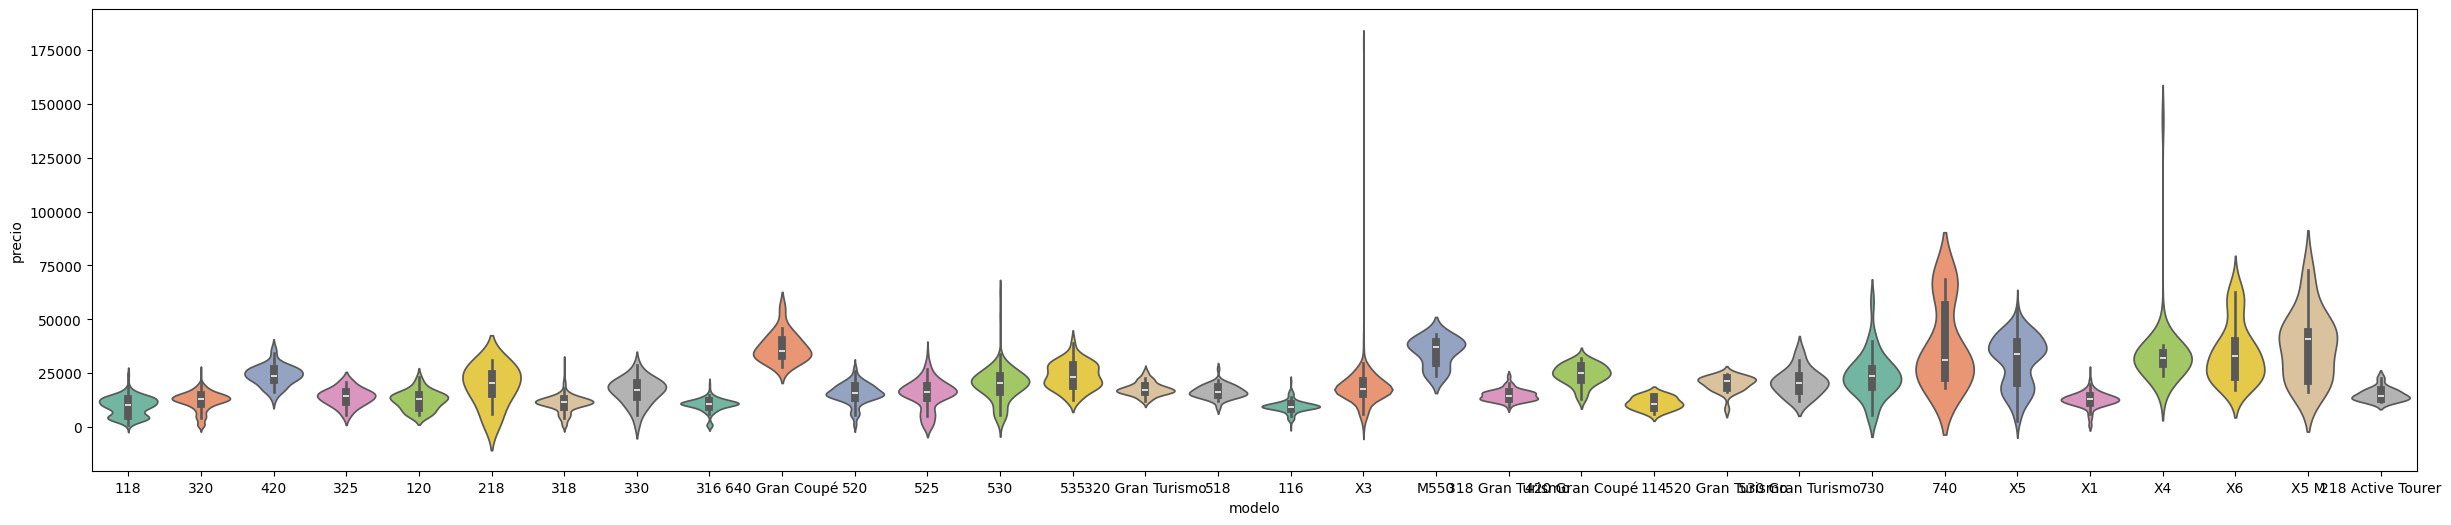

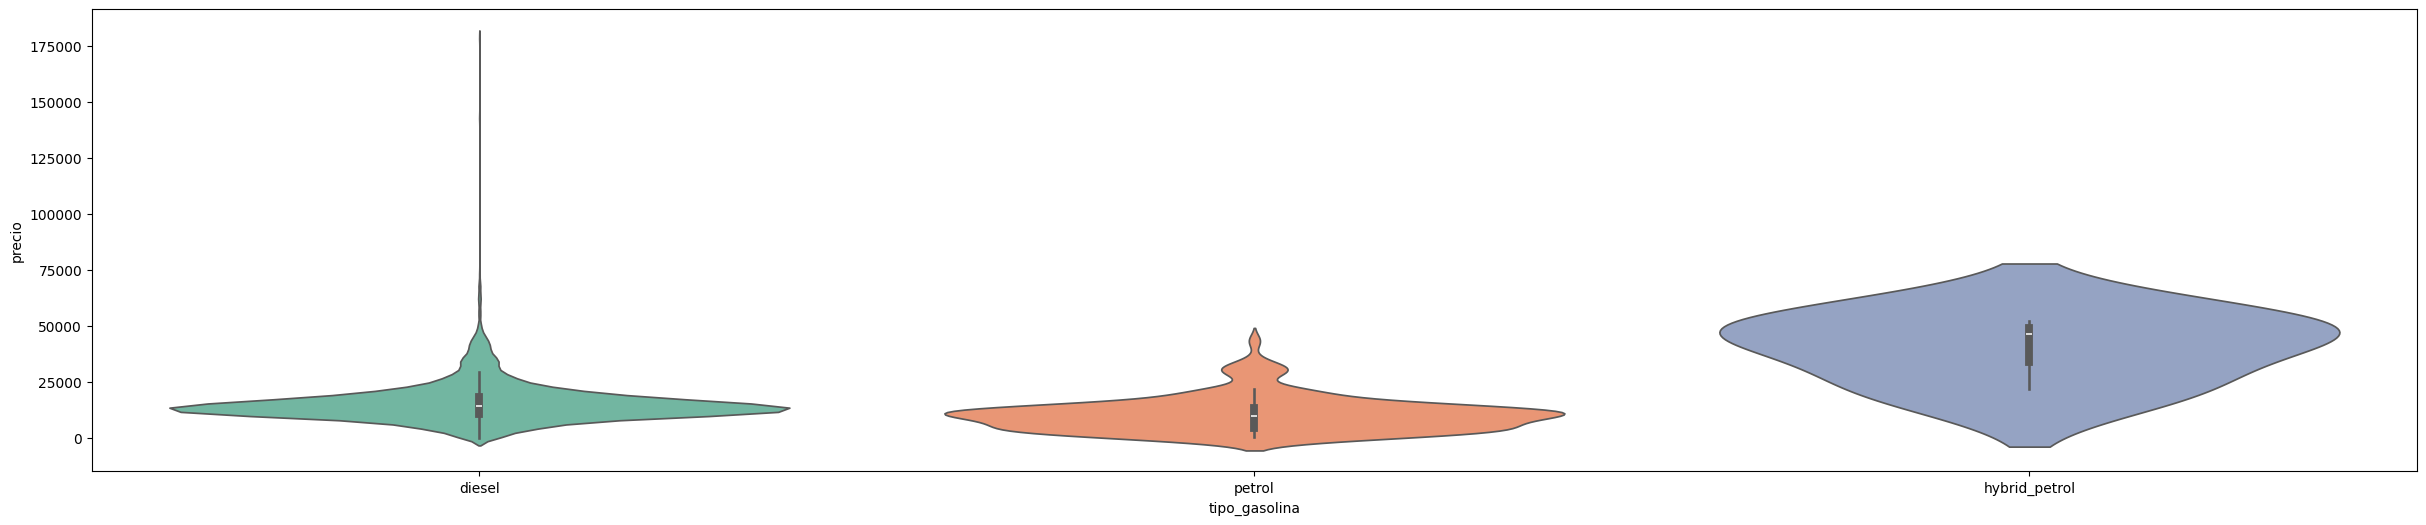

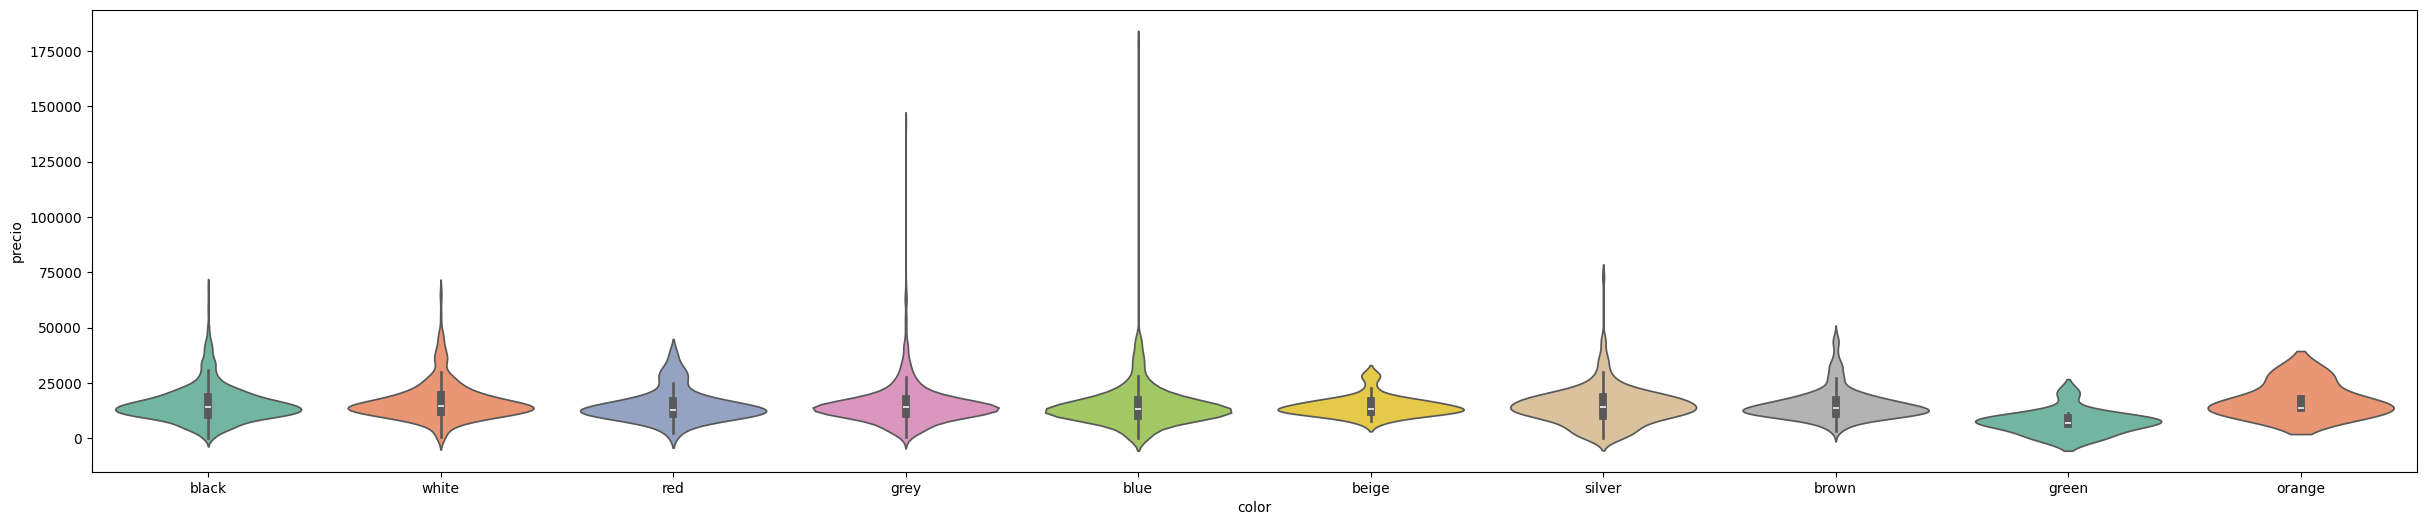

In [ ]:
for i in df_bmw2:
  if (df_bmw2[i].dtype.kind=="O"):
    plt.figure(figsize=(30, 6))
    sns.violinplot(x=i, y="precio", data=df_bmw2, palette="Set2")

Observamos que la mayoria de modelos tienen un precio entorno a los 25.000€ a excepción de 740, X5, X6, X5M que su precio esta entorno a los 50.000€

Vemos que en los modelos diesel y gasolina su precio se distribuye casi igual y que los hibridos tienen un precio más alto

Finalmente vemos que en el color la distribución del precio es parecida en todos los colores

##Relación entre las variables numéricas y el precio

<ipython-input-70-61d15f98fc39>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=i, y="precio", data=df_bmw2, palette="Set2")
<ipython-input-70-61d15f98fc39>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=i, y="precio", data=df_bmw2, palette="Set2")


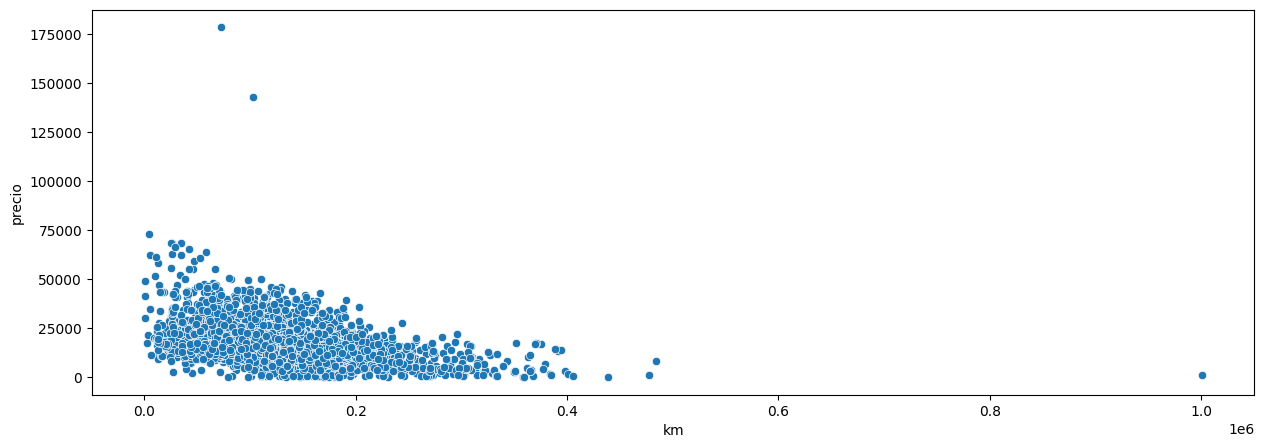

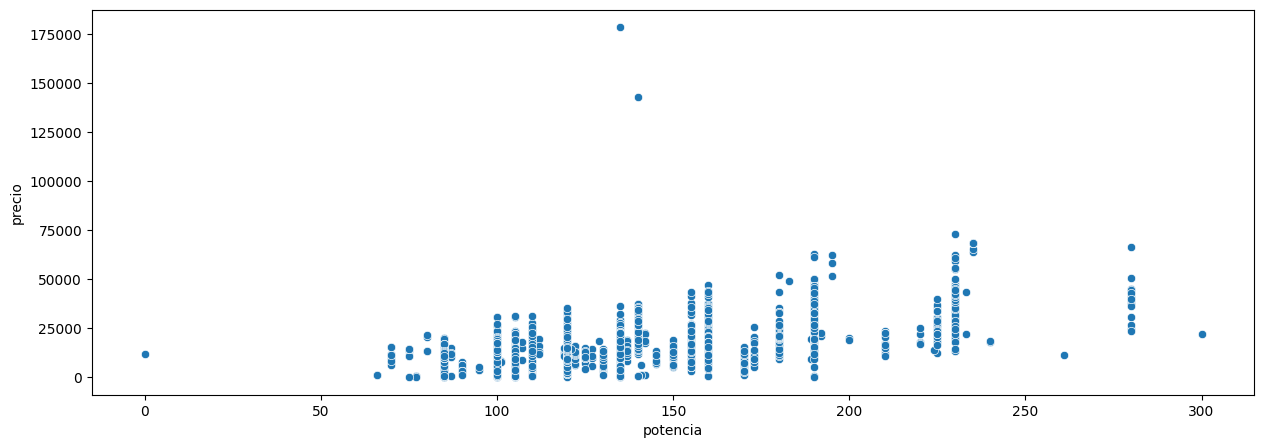

In [ ]:
for i in df_bmw2:
  if (df_bmw2[i].dtype.kind in ("i", "f")) and (i!="precio"):
    plt.figure(figsize=(15,5))
    sns.scatterplot(x=i, y="precio", data=df_bmw2, palette="Set2")

Se aprecia una ligera tendencia en el precio respeto a los kilometros, a menor kilometraje el precio es más alto y viceversa

También apreciamos una ligera tendencia de que a mayor potencia el precio es más elevado y viceversa

#Convertimos las variables categoricas y booleanas a numéricas

In [ ]:
lista_categoricas

['modelo', 'tipo_gasolina', 'color']

In [ ]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

##Creamos una funcion para convertir los valores booleanos a númericos

In [ ]:
df_bmw3 = df_bmw2.copy()

In [ ]:
for i in df_bmw3:
  if (df_bmw3[i].dtype.kind=="b"):
    df_bmw3[i] = df_bmw3[i].astype(int)

In [ ]:
df_bmw3.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,1,1,0,1,1,1,1,1,11300.0,2018-01-01
2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,0,0,0,1,1,0,1,0,10200.0,2018-02-01
3,420,128035.0,135.0,2012-12-06 03:42:38.247209728,diesel,red,1,1,0,1,1,1,1,1,25100.0,2018-02-01
6,325,205219.0,145.0,2012-12-06 03:42:38.247209728,diesel,grey,1,1,0,1,1,1,1,1,12400.0,2018-02-01
7,118,115560.0,105.0,2009-08-01 00:00:00.000000000,petrol,white,1,1,0,1,0,1,1,0,6100.0,2018-02-01


##Fechas

Primero vamos a crear una nueva variable sobre el tiempo en días desde que se registra el vehiculo hasta que se vende que vamos a llamar edad_coche

In [ ]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4682 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4682 non-null   object        
 1   km                           4682 non-null   float64       
 2   potencia                     4682 non-null   float64       
 3   fecha_registro               4682 non-null   datetime64[ns]
 4   tipo_gasolina                4682 non-null   object        
 5   color                        4682 non-null   object        
 6   volante_regulable            4682 non-null   int64         
 7   aire_acondicionado           4682 non-null   int64         
 8   camara_trasera               4682 non-null   int64         
 9   asientos_traseros_plegables  4682 non-null   int64         
 10  elevalunas_electrico         4682 non-null   int64         
 11  bluetooth                    4682 non-null   int

In [ ]:
df_bmw3["edad_coche"] = (df_bmw3["fecha_venta"] - df_bmw3["fecha_registro"])/np.timedelta64(1, "D")

In [ ]:
df_bmw3.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,edad_coche
0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,1,1,0,1,1,1,1,1,11300.0,2018-01-01,2161.000000
2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,0,0,0,1,1,0,1,0,10200.0,2018-02-01,2132.000000
3,420,128035.0,135.0,2012-12-06 03:42:38.247209728,diesel,red,1,1,0,1,1,1,1,1,25100.0,2018-02-01,1882.845391
6,325,205219.0,145.0,2012-12-06 03:42:38.247209728,diesel,grey,1,1,0,1,1,1,1,1,12400.0,2018-02-01,1882.845391
7,118,115560.0,105.0,2009-08-01 00:00:00.000000000,petrol,white,1,1,0,1,0,1,1,0,6100.0,2018-02-01,3106.000000


Vamos a separar las fechas en año, dia y mes

In [ ]:
df_bmw4 = df_bmw3.copy()

In [ ]:
for col in ['fecha_registro', 'fecha_venta']:
  df_bmw4[col + "_AÑO"] = df_bmw4[col].dt.year
  df_bmw4[col + "_MES"] = df_bmw4[col].dt.month
  df_bmw4[col + "_DIA"] = df_bmw4[col].dt.day

  del df_bmw4[col]

df_bmw4.head()


,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,...,gps,alerta_lim_velocidad,precio,edad_coche,fecha_registro_AÑO,fecha_registro_MES,fecha_registro_DIA,fecha_venta_AÑO,fecha_venta_MES,fecha_venta_DIA
0,118,140411.0,100.0,diesel,black,1,1,0,1,1,...,1,1,11300.0,2161.000000,2012,2,1,2018,1,1
2,320,183297.0,120.0,diesel,white,0,0,0,1,1,...,1,0,10200.0,2132.000000,2012,4,1,2018,2,1
3,420,128035.0,135.0,diesel,red,1,1,0,1,1,...,1,1,25100.0,1882.845391,2012,12,6,2018,2,1
6,325,205219.0,145.0,diesel,grey,1,1,0,1,1,...,1,1,12400.0,1882.845391,2012,12,6,2018,2,1
7,118,115560.0,105.0,petrol,white,1,1,0,1,0,...,1,0,6100.0,3106.000000,2009,8,1,2018,2,1


##Aplicamos OneHotEncoding a las variables categoricas

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df_bmw5 = pd.get_dummies(df_bmw4, columns=lista_categoricas, dtype=int)

In [ ]:
df_bmw5.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche,fecha_registro_AÑO,fecha_registro_MES,fecha_registro_DIA,fecha_venta_AÑO,fecha_venta_MES,fecha_venta_DIA,modelo_114,modelo_116,modelo_118,modelo_120,modelo_218,modelo_218 Active Tourer,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_325,modelo_330,modelo_420,modelo_420 Gran Coupé,modelo_518,modelo_520,modelo_520 Gran Turismo,modelo_525,modelo_530,modelo_530 Gran Turismo,modelo_535,modelo_640 Gran Coupé,modelo_730,modelo_740,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X6,tipo_gasolina_diesel,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white
0,140411.0,100.0,1,1,0,1,1,1,1,1,11300.0,2161.000000,2012,2,1,2018,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,183297.0,120.0,0,0,0,1,1,0,1,0,10200.0,2132.000000,2012,4,1,2018,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,128035.0,135.0,1,1,0,1,1,1,1,1,25100.0,1882.845391,2012,12,6,2018,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,205219.0,145.0,1,1,0,1,1,1,1,1,12400.0,1882.845391,2012,12,6,2018,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
7,115560.0,105.0,1,1,0,1,0,1,1,0,6100.0,3106.000000,2009,8,1,2018,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


#Escalamos las variables usando minmaxscaler

In [ ]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4682 entries, 0 to 4842
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4682 non-null   float64
 1   potencia                     4682 non-null   float64
 2   volante_regulable            4682 non-null   int64  
 3   aire_acondicionado           4682 non-null   int64  
 4   camara_trasera               4682 non-null   int64  
 5   asientos_traseros_plegables  4682 non-null   int64  
 6   elevalunas_electrico         4682 non-null   int64  
 7   bluetooth                    4682 non-null   int64  
 8   gps                          4682 non-null   int64  
 9   alerta_lim_velocidad         4682 non-null   int64  
 10  precio                       4682 non-null   float64
 11  edad_coche                   4682 non-null   float64
 12  fecha_registro_AÑO           4682 non-null   int32  
 13  fecha_registro_MES     

In [ ]:
lista_numericas.append("edad_coche")

In [ ]:
MinMax = MinMaxScaler()

In [ ]:
df_bmw5[lista_numericas] = MinMax.fit_transform(df_bmw5[lista_numericas])

In [ ]:
df_bmw5.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche,fecha_registro_AÑO,fecha_registro_MES,fecha_registro_DIA,fecha_venta_AÑO,fecha_venta_MES,fecha_venta_DIA,modelo_114,modelo_116,modelo_118,modelo_120,modelo_218,modelo_218 Active Tourer,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_325,modelo_330,modelo_420,modelo_420 Gran Coupé,modelo_518,modelo_520,modelo_520 Gran Turismo,modelo_525,modelo_530,modelo_530 Gran Turismo,modelo_535,modelo_640 Gran Coupé,modelo_730,modelo_740,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X6,tipo_gasolina_diesel,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white
0,0.139949,0.333333,1,1,0,1,1,1,1,1,11300.0,0.339936,2012,2,1,2018,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0.182839,0.400000,0,0,0,1,1,0,1,0,10200.0,0.337572,2012,4,1,2018,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.127572,0.450000,1,1,0,1,1,1,1,1,25100.0,0.317261,2012,12,6,2018,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.204763,0.483333,1,1,0,1,1,1,1,1,12400.0,0.317261,2012,12,6,2018,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
7,0.115096,0.350000,1,1,0,1,0,1,1,0,6100.0,0.416972,2009,8,1,2018,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


#Repetimos el análisis de correlación

In [ ]:
corr2 = df_bmw5.corr()

In [ ]:
corr2.style.background_gradient(cmap="coolwarm")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche,fecha_registro_AÑO,fecha_registro_MES,fecha_registro_DIA,fecha_venta_AÑO,fecha_venta_MES,fecha_venta_DIA,modelo_114,modelo_116,modelo_118,modelo_120,modelo_218,modelo_218 Active Tourer,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_325,modelo_330,modelo_420,modelo_420 Gran Coupé,modelo_518,modelo_520,modelo_520 Gran Turismo,modelo_525,modelo_530,modelo_530 Gran Turismo,modelo_535,modelo_640 Gran Coupé,modelo_730,modelo_740,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X6,tipo_gasolina_diesel,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white
km,1.000000,-0.018678,0.073889,0.018559,0.007765,-0.037534,0.041458,-0.002517,0.156387,-0.035829,-0.400366,0.324630,-0.333826,-0.001251,0.006322,-0.032557,-0.005506,nan,-0.065227,-0.118042,-0.016632,-0.012137,-0.076778,-0.038538,-0.000830,0.053318,0.003631,0.091541,-0.021911,-0.017794,-0.013195,-0.094086,-0.085893,0.027050,0.086307,-0.004976,0.094906,0.067619,0.048310,0.024826,-0.022479,0.012371,-0.016563,-0.001085,-0.066437,-0.043641,-0.101910,-0.043503,-0.026862,-0.029220,0.009154,-0.018409,-0.006478,-0.004346,0.034910,-0.018256,-0.027540,0.028211,0.024525,-0.015647,-0.016234,0.025620,-0.065405
potencia,-0.018678,1.000000,0.331542,0.193375,0.320553,0.133561,0.357102,0.168100,0.005441,0.435919,0.626956,-0.059833,0.057847,-0.000972,-0.012448,-0.003335,-0.023605,nan,-0.087294,-0.334670,-0.117379,0.012458,-0.030010,-0.031445,-0.269154,-0.267364,-0.101535,-0.012968,0.021671,0.053927,0.137618,0.013256,0.014037,-0.080339,0.004004,-0.001275,0.132153,0.305719,0.099167,0.280332,0.177193,0.117788,0.178629,0.214891,-0.119114,0.066062,0.073878,0.391234,0.108156,0.232126,-0.000997,0.076905,-0.010580,-0.021058,0.036877,-0.010049,-0.051308,-0.015120,0.002025,0.004319,-0.020344,0.016060,-0.007788
volante_regulable,0.073889,0.331542,1.000000,0.291168,0.253093,0.063014,0.279718,0.103777,0.244387,0.185603,0.265699,0.047841,-0.037274,-0.016774,-0.003003,-0.000379,0.081221,nan,-0.062189,-0.194557,-0.119911,-0.037625,-0.038636,-0.033424,-0.131505,-0.094227,-0.045102,-0.091934,-0.013393,0.024451,0.020397,0.011316,0.030653,0.065339,0.180588,0.057916,0.095313,0.103082,0.035837,0.064711,0.056633,0.071677,0.056633,0.029242,-0.098036,0.058623,0.060361,0.148253,0.055032,0.084346,0.040221,0.023083,-0.044127,-0.025473,0.004050,0.013454,0.040572,0.007340,0.053952,0.011974,-0.038153,-0.012515,-0.103271
aire_acondicionado,0.018559,0.193375,0.291168,1.000000,0.142812,0.042291,0.259370,0.100871,0.349238,0.167504,0.221487,-0.139586,0.140976,-0.006182,-0.028067,-0.013825,0.007050,nan,-0.050921,-0.155033,-0.104202,-0.040002,-0.019407,0.014661,-0.037300,0.011392,0.030604,-0.045670,0.002162,-0.012896,-0.012520,-0.023398,0.020372,0.042918,0.136514,0.033448,0.047734,0.070330,0.020681,0.047419,0.020681,0.040107,0.029574,0.024131,-0.111083,-0.009600,0.019521,0.075414,0.028737,0.040663,0.085342,-0.009694,-0.084789,0.009368,0.008849,-0.002478,0.048149,-0.016716,0.027048,0.013920,-0.040706,-0.035440,-0.048783
camara_trasera,0.007765,0.320553,0.253093,0.142812,1.000000,0.053343,0.199185,0.118890,0.067880,0.164705,0.252200,0.023566,-0.021419,0.012185,0.003215,0.014439,0.022459,nan,-0.018706,-0.102739,-0.035319,-0.006964,-0.014607,-0.016053,-0.082075,-0.099162,-0.023419,-0.066689,0.010945,-0.014882,0.022154,-0.031019,0.028558,0.004174,0.008990,0.057023,0.060069,0.080003,0.064345,0.086274,0.073003,0.099006,0.081661,0.048972,-0.025812,0.024260,-0.000638,0.148962,0.067969,0.095948,-0.004575,-0.012590,0.006521,-0.018269,0.001943,0.001766,-0.016325,0.014492,0.018920,-0.014539,-0.031019,0.001135,-0.004970
asientos_traseros_plegables,-0.037534,0.133561,0.063014,0.042291,0.053343,1.000000,0.072885,0.0185

In [ ]:
corr3 = corr2.where(np.triu(np.ones(corr2.shape),k=1).astype(bool)) # Nos quedamos con el triangulo superior

In [ ]:
corr4 = corr3.unstack().dropna() #Borramos los nulos y modificamos la tabla

In [ ]:
corr4

potencia            km             -0.018678
volante_regulable   km              0.073889
                    potencia        0.331542
aire_acondicionado  km              0.018559
                    potencia        0.193375
                                      ...   
color_white         color_green    -0.017480
                    color_grey     -0.176586
                    color_orange   -0.009687
                    color_red      -0.031894
                    color_silver   -0.083549
Length: 1891, dtype: float64

In [ ]:
corr5 = corr4.sort_values() #Ordenamos los valores

In [ ]:
corr5.tail(20)

elevalunas_electrico  aire_acondicionado      0.259370
precio                volante_regulable       0.265699
                      elevalunas_electrico    0.278002
elevalunas_electrico  volante_regulable       0.279718
modelo_535            potencia                0.280332
aire_acondicionado    volante_regulable       0.291168
alerta_lim_velocidad  elevalunas_electrico    0.298269
modelo_530            potencia                0.305719
fecha_registro_AÑO    precio                  0.318118
camara_trasera        potencia                0.320553
edad_coche            km                      0.324630
volante_regulable     potencia                0.331542
gps                   aire_acondicionado      0.349238
elevalunas_electrico  potencia                0.357102
precio                alerta_lim_velocidad    0.385801
modelo_X5             precio                  0.389359
                      potencia                0.391234
alerta_lim_velocidad  potencia                0.435919
precio                potencia                0.626956
fecha_registro_DIA    fecha_registro_MES      0.779677
dtype: float64

In [ ]:
corr5.head(20)

,,0
tipo_gasolina_petrol,tipo_gasolina_diesel,-0.988823
fecha_registro_AÑO,edad_coche,-0.966168
color_grey,color_black,-0.437215
precio,km,-0.400366
modelo_116,potencia,-0.334670
fecha_registro_AÑO,km,-0.333826
color_blue,color_black,-0.321930
edad_coche,precio,-0.307310
color_white,color_black,-0.271712
modelo_316,potencia,-0.269154


Observamos que el precio tiene una correlación alta positiva con la potencia (a mayor potencia mayor es el precio)

En cambio observamos una correlación negativa del precio con los km (a más km menor es el precio)

otra variable que podemos destacar es la fecha_registro_AÑO, si el coche es más nuevo el precio es más alto, y si el coche es más nuevo tiene menos km